In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv("E://PHD/Course materials/Sem 1/Data Mining/Assignment/workspace/stock_price_trend_prediction/stock_price_pred_data_mining/Data/05_cluster_output/cluster_output.csv")

In [6]:
df.head(2)

,Date,stock_id,Open,High,Low,Close,Volume,MA7,MA21,EMA20,...,BB_middle,BB_lower,CCI_14,CMF_20,Stoch_K,Stoch_D,Momentum_10,Daily_Return,Log_Return,cluster
0,2021-12-14,ANANDRATHI,287.24,294.42,270.75,279.37,27861900.0,274.57858,284.5581,283.8015,...,283.8015,310.46637,-4213.020993,-0.169092,80.29088,84.21576,-5.51,0.002398,0.002395,1
1,2021-12-15,ANANDRATHI,280.06,286.67,276.71,280.04,2675624.0,274.57858,284.5581,283.8015,...,283.8015,310.46637,-4213.020993,-0.169092,80.29088,84.21576,-5.51,0.002398,0.002395,1


In [7]:
df_features = df.drop(columns=['Date', 'stock_id'])

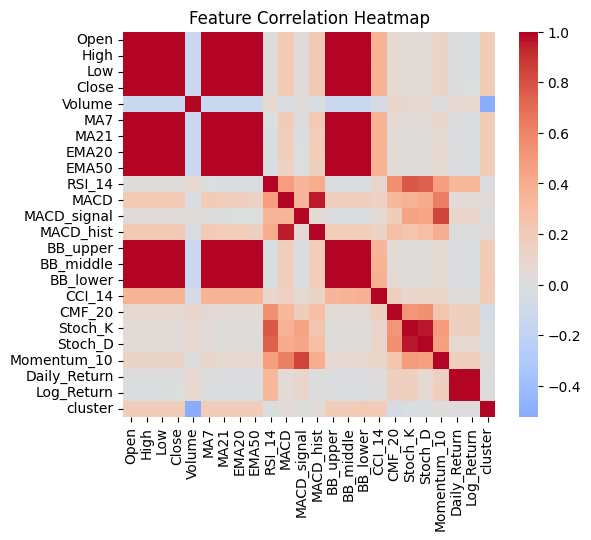

In [9]:
corr_matrix = df_features.corr()

# Visualize correlation
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [12]:
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr < 1) & (high_corr > 0.9)]
print("Highly correlated feature pairs:\n")
high_corr.head(150)

Highly correlated feature pairs:



BB_middle   MA21            0.999996
MA21        BB_middle       0.999996
EMA20       BB_middle       0.999930
BB_middle   EMA20           0.999930
MA21        EMA20           0.999920
                              ...   
Log_Return  Daily_Return    0.993385
Stoch_K     Stoch_D         0.959651
Stoch_D     Stoch_K         0.959651
MACD_hist   MACD            0.952883
MACD        MACD_hist       0.952883
Length: 116, dtype: float64

In [40]:
type(high_corr)

pandas.core.series.Series

In [41]:
high_corr

file_path = "E://PHD/Course materials/Sem 1/Data Mining/Assignment/workspace/stock_price_trend_prediction/stock_price_pred_data_mining/Data/"
high_corr.to_csv(f"{file_path}/06_feature_selection/correlation.csv", index=True)

## Defining Target variable

In [23]:
def trend_label(x):
    if x > 0.005:
        return 1      # Uptrend
    elif x < -0.005:
        return -1     # Downtrend
    else:
        return 0       # Neutral

df['future_return'] = df.groupby('stock_id')['Close'].pct_change().shift(-1)
df['target'] = df['future_return'].apply(trend_label)


In [24]:
df.head(2)

,Date,stock_id,Open,High,Low,Close,Volume,MA7,MA21,EMA20,...,CCI_14,CMF_20,Stoch_K,Stoch_D,Momentum_10,Daily_Return,Log_Return,cluster,future_return,target
0,2021-12-14,ANANDRATHI,287.24,294.42,270.75,279.37,27861900.0,274.57858,284.5581,283.8015,...,-4213.020993,-0.169092,80.29088,84.21576,-5.51,0.002398,0.002395,1,0.002398,0
1,2021-12-15,ANANDRATHI,280.06,286.67,276.71,280.04,2675624.0,274.57858,284.5581,283.8015,...,-4213.020993,-0.169092,80.29088,84.21576,-5.51,0.002398,0.002395,1,-0.024032,-1


In [25]:
print(df['target'].describe())

count    72848.000000
mean        -0.004503
std          0.858713
min         -1.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64


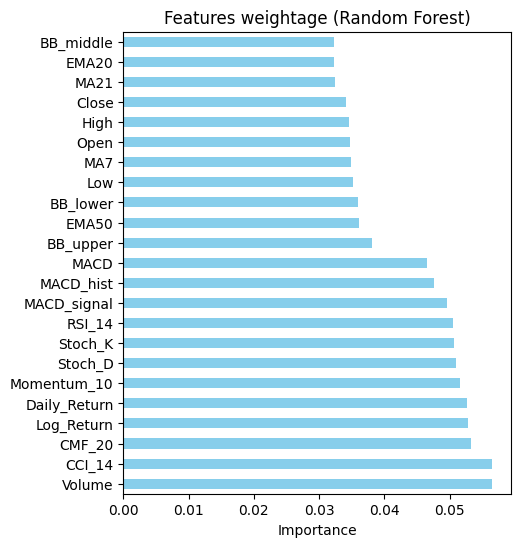

In [37]:
#Use Statistical or Model-Based Feature Importance

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = df.drop(columns=['target', 'stock_id', 'Date','future_return','cluster'])
y = df['target']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(25)

top_features.plot(kind='barh', figsize=(5,6), color='skyblue')
plt.title('Features weightage (Random Forest)')
plt.xlabel('Importance')
plt.show()

In [38]:
top_features

Volume          0.056564
CCI_14          0.056499
CMF_20          0.053230
Log_Return      0.052879
Daily_Return    0.052604
Momentum_10     0.051642
Stoch_D         0.050972
Stoch_K         0.050690
RSI_14          0.050460
MACD_signal     0.049655
MACD_hist       0.047647
MACD            0.046593
BB_upper        0.038074
EMA50           0.036127
BB_lower        0.035951
Low             0.035145
MA7             0.034873
Open            0.034741
High            0.034624
Close           0.034165
MA21            0.032406
EMA20           0.032236
BB_middle       0.032224
dtype: float64

In [ ]:
# As per the correlation matrix, removing these features:
# 1. BB_middle
# 2. High 

# Based on the Random Forest algorithm, removing these features:
# 1. EMA20
# 2. MA21